<a href="https://colab.research.google.com/github/CuriousAboutData/portfolio-projects/blob/main/co2_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers wordcloud matplotlib emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.7 MB/s eta 0:00:00


A status is a tweet .
A friendship is a follow-follower relationship.
A favorite is a like.

In [2]:
# !pip install snscrape
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-jytdz2xj
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-jytdz2xj
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit b76f485208016f337ce36a3c6c0c6573502693a7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev32+gb76f485-py3-none-any.whl size=73275 sha256=6a05625dc8f6b30c196a6b312da6b45c1d88c7d105b222c2d41a1d4eff85fa34
  Stored in directory: /tmp/pip-ephem-wheel-cache-qjtzemal/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "carbon emission since:2020-01-01 until:2023-05-31"
tweets = []
limit = 500

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
tweets_df = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

tweets_df.head()

In [20]:
len(tweets_df)

500

In [ ]:
text_list = tweets_df['Text'].values.tolist()
print(text_list)

In [22]:
from transformers import pipeline

sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

tweets_sentiment = []
for text in text_list:
    try: 
      sentiment = sentiment_analysis(text)
      tweets_sentiment.append({'tweet': text, 'sentiment': sentiment[0]['label']})
    except Exception:
      pass

In [23]:
sentiment_df = pd.DataFrame(tweets_sentiment)
pd.set_option('display.max_colwidth', None)

display(sentiment_df[sentiment_df["sentiment"] == 'POS'].head(1))
display(sentiment_df[sentiment_df["sentiment"] == 'NEU'].head(1))
display(sentiment_df[sentiment_df["sentiment"] == 'NEG'].head(1))


,tweet,sentiment
12,"""@Talaxeum green project launcher blockchain based platform specializing in supporting green projects for energy efficient and net- zero carbon emission project. #Talaxeum #Testnet #Airdrop""",POS


,tweet,sentiment
2,"N. CANADA LOG-JAM 20 sq. miles, 3.4 MILLION TONS CARBON (study)\nIn Canada's far north Mackenzie Delta 20 sq. miles of logs contain 3.4 million tons of carbon \nGlobal warming could lead to its break down and carbon emission. https://t.co/xOgJFG2uTQ\n#climatechange. #globalwarming https://t.co/cejrWdWGFl",NEU


,tweet,sentiment
0,Everytime I fart AOC sucks my dick for some instant shade relief from the GHGs. I then pay my carbon emission tax on her face and in her throat.,NEG


## Visualize the sentiments

sentiment
NEG    145
NEU    216
POS    129
dtype: int64


<Axes: >

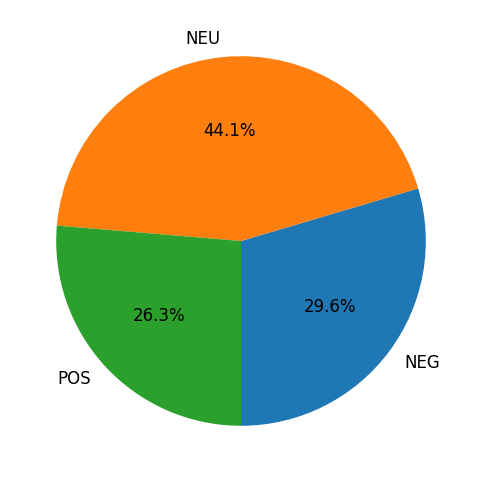

In [25]:
import matplotlib.pyplot as plt

sentiment_counts = sentiment_df.groupby(['sentiment']).size()
print(sentiment_counts)

fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

### Wordcloud with positive tweets

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


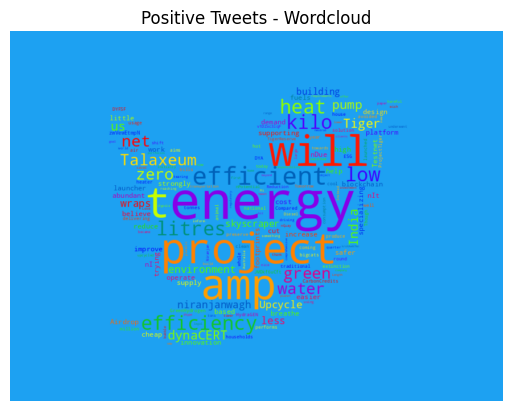

In [111]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import numpy as np
from PIL import Image

mask = np.array(Image.open("/content/gdrive/MyDrive/Colab Notebooks/twitter.jpg").convert("L"))

positive_tweets = sentiment_df['tweet'][sentiment_df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT", "nhttps", "n", "carbon emission", "CarbonEmission", "carbon", "emission"] + list(STOPWORDS)

positive_wordcloud = WordCloud(collocations = False, background_color="#1DA1F2", stopwords = stop_words, contour_color='#1DA1F2', contour_width=1, mask=mask, colormap='prism').generate(str(positive_tweets))

plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')

# plt.savefig("gdrive/MyDrive/Colab Notebooks/wordcloud.png", format="png")

plt.show()

### Wordcloud with negative tweets

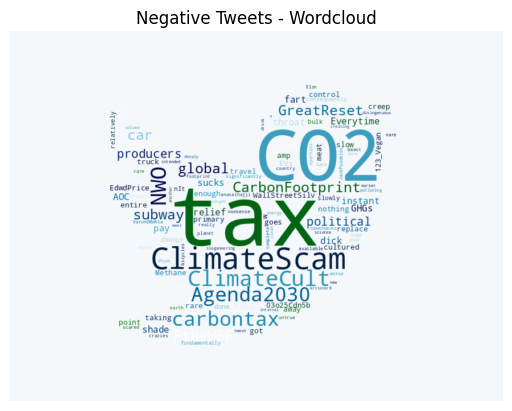

In [133]:
negative_tweets = sentiment_df['tweet'][sentiment_df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT", "nhttps", "n", "carbon emission", "CarbonEmission", "carbon", "emission"] + list(STOPWORDS)
negative_wordcloud = WordCloud(collocations = False, background_color="#F5F8FA", stopwords = stop_words, mask=mask, colormap='ocean').generate(str(negative_tweets))

plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()